# Task 3

1)Write short notes(max 3 lines in your own words) regarding the
various types of recommender systems

A)
Collaborative filtering and Content based filtering are two common methods of recommender systems.Collaborative filtering gives recommendations to a user X based on preferences of users whose interests are similar to user X.Content based filtering gives recommendation to a user X based on similarity between a new product Y and the products user X previously liked.

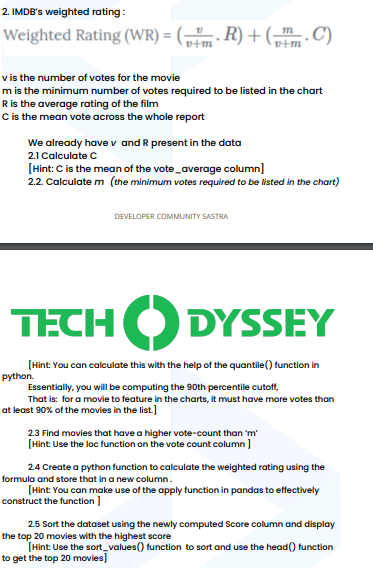

#### Note : im using the preprocessed dataset from  task 1 for this task
2.1) Calculate C


In [1]:
import pandas as pd
df=pd.read_csv("NonScaled_title.csv")
print("The Average vote/ C value is : ",df["vote_average"].mean())
C=df["vote_average"].mean()

The Average vote/ C value is :  6.168162947586924


2.2)Calculate m (vote_count of 90th percentile data)

In [2]:
import numpy as np
m=np.quantile(df["vote_count"],0.9)
print("The 90th percentile value of vote count is: ",m)

The 90th percentile value of vote count is:  1371.7000000000003


2.3)Find movies that have a higher vote-count than ‘m’

In [3]:
titles=df.iloc[:,[1,-5]].values
movies=[]
for i in range(0,len(titles)):
    if(titles[i,1]>m):
        movies.append(titles[i,0])
print("Number of movies having higher vote count than ",m," is: ",len(movies))


Number of movies having higher vote count than  1371.7000000000003  is:  386


In [4]:
print("The list of movies having higher vote count than m: ")
for i in movies:
    print(i,end="\n")

The list of movies having higher vote count than m: 
Jurassic World
Mad Max: Fury Road
Insurgent
Star Wars: The Force Awakens
Furious 7
The Revenant
Terminator Genisys
The Martian
Minions
Inside Out
Spectre
Jupiter Ascending
Ex Machina
Pixels
Avengers: Age of Ultron
The Hateful Eight
Taken 3
Ant-Man
Cinderella
The Hunger Games: Mockingjay - Part 2
Tomorrowland
Southpaw
San Andreas
Fifty Shades of Grey
The Big Short
Mission: Impossible - Rogue Nation
Ted 2
Kingsman: The Secret Service
Spotlight
Maze Runner: The Scorch Trials
Chappie
Bridge of Spies
Room
The Man from U.N.C.L.E.
Sicario
Fantastic Four
Spy
Focus
Interstellar
Guardians of the Galaxy
Captain America: The Winter Soldier
John Wick
The Hunger Games: Mockingjay - Part 1
The Hobbit: The Battle of the Five Armies
Big Hero 6
The Imitation Game
The Maze Runner
Birdman
Gone Girl
Fury
Divergent
X-Men: Days of Future Past
Lucy
Teenage Mutant Ninja Turtles
Nightcrawler
Transformers: Age of Extinction
The Grand Budapest Hotel
Whiplash
Da

2.4)Create a python function to calculate the weighted rating using the
formula and store that in a new column .


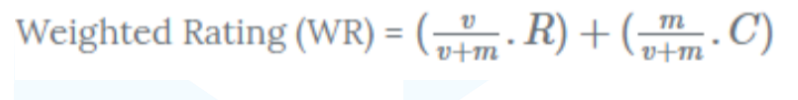

In [5]:
def weightedRating(df,m,C):
    WR=[]
    #v is the number of votes for the movie
    #m is the minimum number of votes required to be listed in the chart
    # R is the average rating of the film
    #C is the mean vote across the whole report
    var=df.iloc[:,[-5,-4]].values
    # var is list of [v,R]
    length=len(var)
    for i in range(0,length):
        v=var[i,0]
        R=var[i,1]
        WR.append(((v/(v+m))*R)+((m/(v+m))*C))
    df["Weighted_Rating"]=WR
    df=df.reindex(columns=["imdb_id","original_title","Weighted_Rating","popularity",
                                 "budget","revenue","title_wordcount","hasWebpage","runtime",
                                 "ReleaseOnWeekend","vote_count","vote_average","release_year","budget_adj","revenue_adj"])
    return df

In [6]:
df=weightedRating(df,m,C)


The new dataframe is:

In [7]:
df

,imdb_id,original_title,Weighted_Rating,popularity,budget,revenue,title_wordcount,hasWebpage,runtime,ReleaseOnWeekend,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,tt0369610,Jurassic World,6.434352,32.985763,150000000,1513528810,2,1,124,0,5562,6.5,2015,1.379999e+08,1.392446e+09
1,tt1392190,Mad Max: Fury Road,6.930852,28.419936,150000000,378436354,4,1,120,0,6185,7.1,2015,1.379999e+08,3.481613e+08
2,tt2908446,Insurgent,6.253049,13.112507,110000000,295238201,1,1,119,0,2480,6.3,2015,1.012000e+08,2.716190e+08
3,tt2488496,Star Wars: The Force Awakens,7.225846,11.173104,200000000,2068178225,5,1,136,0,5292,7.5,2015,1.839999e+08,1.902723e+09
4,tt2820852,Furious 7,6.940507,9.335014,190000000,1506249360,2,1,137,0,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3849,tt0061184,Who's Afraid of Virginia Woolf?,6.236335,0.670274,7500000,33736689,5,0,131,0,74,7.5,1966,5.038511e+07,2.266436e+08
3850,tt0061107,Torn Curtain,6.172441,0.402730,3000000,13000000,2,0,128,0,46,6.3,1966,2.015404e+07,8.733419e+07
3851,tt0061619,El Dorado,6.186879,0.395668,4653000,6000000,2,0,120,1,36,6.9,1966,3.125892e+07,4.030809e+07
3852,tt0060934,The Sand Pebbles,6.184803,0.299911,12000000,20000000,3,0,182,0,28,7.0,1966,8.061618e+07,1.343603e+08


2.5)Sort the dataset using the newly computed Score column and display
the top 20 movies with the highest score

In [8]:
df.sort_values("Weighted_Rating",axis=0,ascending=False,inplace=True)

Top 20 movies with highest score:

In [9]:
df.head(20)

,imdb_id,original_title,Weighted_Rating,popularity,budget,revenue,title_wordcount,hasWebpage,runtime,ReleaseOnWeekend,vote_count,vote_average,release_year,budget_adj,revenue_adj
1427,tt0111161,The Shawshank Redemption,7.970371,7.192039,25000000,28341469,3,0,142,1,5754,8.4,1994,3.677779e+07,4.169346e+07
933,tt0468569,The Dark Knight,7.829704,8.466668,185000000,1001921825,3,1,152,0,8432,8.1,2008,1.873655e+08,1.014733e+09
2557,tt0068646,The Godfather,7.752564,5.738034,6000000,245066411,2,1,175,0,3970,8.3,1972,3.128737e+07,1.277914e+09
696,tt0137523,Fight Club,7.736736,8.947905,63000000,100853753,2,1,139,0,5923,8.1,1999,8.247033e+07,1.320229e+08
1426,tt0110912,Pulp Fiction,7.705358,8.093754,8000000,213928762,2,0,154,1,5343,8.1,1994,1.176889e+07,3.147131e+08
518,tt1375666,Inception,7.686729,9.363643,160000000,825500000,1,1,148,0,9767,7.9,2010,1.600000e+08,8.255000e+08
160,tt0816692,Interstellar,7.680708,24.949134,165000000,621752480,1,1,169,0,6498,8.0,2014,1.519800e+08,5.726906e+08
1428,tt0109830,Forrest Gump,7.674498,6.715966,55000000,677945399,2,0,142,0,4856,8.1,1994,8.091114e+07,9.973333e+08
1646,tt0167260,The Lord of the Rings: The Return of the King,7.561007,7.122455,94000000,1118888979,10,1,201,0,5636,7.9,2003,1.114231e+08,1.326278e+09
161,tt2015381,Guardians of the Galaxy,7.559842,14.311205,170000000,773312399,4,1,121,0,5612,7.9,2014,1.565855e+08,7.122911e+08


3.1) Hits of all time recommender (top 10 most popular movies)

In [10]:
popdf=df.sort_values("popularity",axis=0,ascending=False)


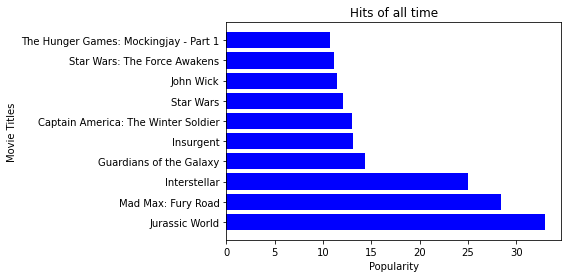

In [11]:
import matplotlib.pyplot as plt
pop=list(popdf.iloc[:10,3].values)
titles=list(popdf.iloc[:10,1].values)
plt.barh(titles,pop,color="blue")
plt.ylabel("Movie Titles")
plt.xlabel("Popularity")
plt.title("Hits of all time")
plt.show()

#### End of task3